# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

In [2]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.10.0'

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

In [3]:
from tensorflow import keras
keras.__version__

'2.10.0'

In [4]:
keras.layers.Dense(10, activation='sigmoid')

In [5]:
keras.Model()

In [6]:
keras.models.Sequential()

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

In [7]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [8]:
Dense(10, activation='relu')

In [9]:
Flatten(input_shape=[28,28])

In [10]:
X_train = np.random.randn(5500, 2)
Input(shape=X_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

In [11]:
X_train.shape[1:]

(2,)

In [12]:
X_train.shape

(5500, 2)

## 주요 레이어

### Dense
- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform' 가중치(Xavier 초기화), zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [13]:
dense = Dense(10, activation='relu', name='Dense Layer')

In [14]:
dense

In [15]:
dense2 = Dense(15, activation='softmax')

In [16]:
dense2

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

In [17]:
dense = Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense = Activation(dense)
dense

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

In [18]:
Flatten(input_shape=(28,28))

### Input 
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- summary() 메소드를 통해서는 보이지 않음

In [19]:
input_1 = Input(shape=(28,28), dtype=tf.float32)
input_2 = Input(shape=(8,), dtype=tf.int32)

In [20]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [21]:
input_2

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_3')>

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [22]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [23]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 구조 확인
- model 객체의 **summary()** 이용

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


In [25]:
%matplotlib inline 

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 함수형 API

- 가장 권장되는 방벚

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [27]:
inputs = Input(shape=(28,28))
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [28]:
model = Model(inputs=inputs, outputs=x)

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
plot_model(model, to_file='model3.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [32]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])

In [33]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 28, 100)      2900        ['input_6[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 28, 30)       3030        ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_6[0][0]',                
                                                                  'dense_10[0][0]']         

In [34]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [35]:
plot_model(model, to_file='model4.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [36]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])

In [37]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 10, 10)       1010        ['dense_12[0][0]']               
                                                                                            

In [38]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [39]:
plot_model(model, to_file='model5.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
input_ = Input(shape=(10,10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

In [41]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_15 (Dense)               (None, 10, 10)       1010        ['dense_14[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_15[0][0]']               
                                                                                            

In [42]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
plot_model(model, to_file='model6.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [44]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)

concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])


In [45]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 10, 10)       1010        ['dense_16[0][0]']               
                                                                                            

In [46]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [47]:
plot_model(model, to_file='model7.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, DenseFeatures
from tensorflow.keras.utils import plot_model

In [51]:
class MyModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)
        
        self.dense_layer1 = Dense(300, activation=activation)
        self.dense_layer2 = Dense(100, activation=activation)
        self.dense_layer3 = Dense(units, activation=activation)
        
        self.output_layer1 = Dense(1, activation='softmax')
        
    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer3(x)
        return x
        

## 모델 가중치 확인

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [60]:
inputs = Input(shape=(28,28,1))

x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu', name='Dense1')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)


In [63]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 300)               235500    
                                                                 
 dense_23 (Dense)            (None, 100)               30100     
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


모델의 레이어들이 리스트로 표현됨


In [55]:
model.layers

In [61]:
hidden_2 = model.layers[2]
hidden_2.name

'Dense1'

위의 layer name 참고

In [64]:
model.get_layer('Dense1') is hidden_2

True

In [65]:
weights, biases = hidden_2.get_weights()

In [66]:
weights

array([[ 0.02298062, -0.04862607, -0.03170595, ...,  0.06366687,
         0.02457127,  0.03998008],
       [ 0.05558884, -0.00091421,  0.036608  , ..., -0.0091787 ,
        -0.02174734, -0.04645782],
       [ 0.0647269 ,  0.05747527,  0.02529239, ...,  0.07292555,
        -0.0248899 ,  0.00707359],
       ...,
       [-0.00109783,  0.006684  , -0.04983551, ..., -0.00964272,
        -0.04758651,  0.05570863],
       [-0.03018892, -0.03304067, -0.01311049, ...,  0.03027137,
        -0.03245082,  0.0657559 ],
       [ 0.05639561,  0.04373384,  0.07090789, ...,  0.03991768,
        -0.02067574, -0.04190351]], dtype=float32)

In [68]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [69]:
print(weights.shape)
print(biases.shape)


(784, 300)
(300,)


## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


In [72]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])
      
- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])
 


## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import

In [74]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')



### 데이터셋 로드
- MNIST 데이터셋을 로드

- Train Data 중, 30%를 검증 데이터(valiation data)로 사용


In [75]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

### 데이터 확인

In [84]:
num_x_train = x_train.shape[0]   # 학습 데이터
num_x_val = x_val.shape[0]       # 검증 데이터
num_x_test = x_test.shape[0]     # 테스트 데이터

In [85]:
print("학습 데이터 : {}\t 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터 : {}\t 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터 : {}\t 레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터 : (60000, 28, 28)	 레이블: (60000,)
학습 데이터 : (42000, 28, 28)	 레이블: (42000,)
검증 데이터 : (18000, 28, 28)	 레이블: (18000,)
테스트 데이터 : (10000, 28, 28)	 레이블: (10000,)


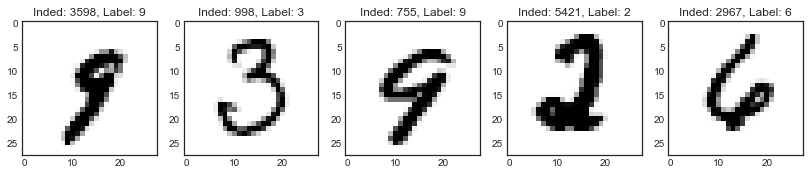

In [87]:
num_sample = 5

random_idxs = np.random.randint(6000, size=num_sample)

plt.figure(figsize=(14, 8))
for i, idx in enumerate(random_idxs):
    img = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(img)
    plt.title("Index: {}, Label: {}".format(idx, label))

In [90]:
y_train[0]

8

### 데이터 전처리
- Normalization

In [91]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [92]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 모델 구성 (Sequential)

In [93]:
model = Sequential([Input(shape=(28,28), name='input'),
                    Flatten(input_shape=[28,28], name='flatten'),
                    Dense(100, activation='relu', name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(10, activation='softmax', name='output')])

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [95]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [97]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 모델 컴파일

In [100]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [101]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 1s 3ms/step - loss: 1.8539 - accuracy: 0.4562 - val_loss: 1.2116 - val_accuracy: 0.7127
Epoch 2/50
329/329 [==============================] - 1s 2ms/step - loss: 0.8526 - accuracy: 0.7799 - val_loss: 0.6307 - val_accuracy: 0.8290
Epoch 3/50
329/329 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.8550 - val_loss: 0.4618 - val_accuracy: 0.8698
Epoch 4/50
329/329 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8832 - val_loss: 0.3884 - val_accuracy: 0.8892
Epoch 5/50
329/329 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8964 - val_loss: 0.3505 - val_accuracy: 0.8990
Epoch 6/50
329/329 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.9054 - val_loss: 0.3406 - val_accuracy: 0.8999
Epoch 7/50
329/329 [==============================] - 1s 2ms/step - loss: 0.3081 - accuracy: 0.9131 - val_loss: 0.3190 - val_accuracy: 0.9061
Epoch 

### 학습 결과 시각화

In [102]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

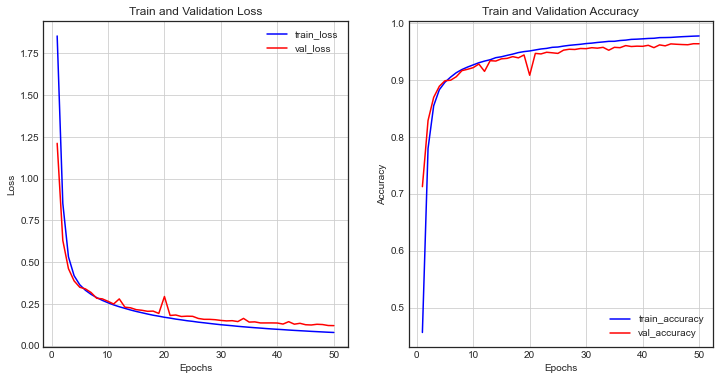

In [104]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- evaluate

In [105]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 973us/step - loss: 0.1155 - accuracy: 0.9655


[0.11547326296567917, 0.965499997138977]

### 학습된 모델을 통해 값 예측

In [106]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
print(pred_ys[0])

313/313 [==============================] - 0s 771us/step
(10000, 10)
[1.9869776e-06 2.7940155e-06 1.9717988e-04 2.4380239e-03 7.9655712e-07
 1.7925708e-05 1.2398776e-07 9.9730742e-01 5.2753326e-06 2.8509505e-05]


Text(0.5, 1.0, 'predicted label: 7')

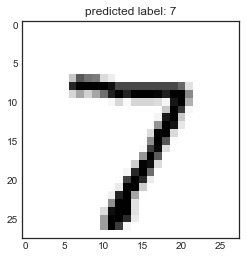

In [107]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0])
plt.title("predicted label: {}".format(arg_pred_y[0]))

Text(0.5, 1.0, 'predicted label: 2')

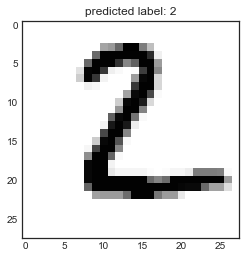

In [109]:
plt.imshow(x_test[1])
plt.title("predicted label: {}".format(arg_pred_y[1]))

### 모델 평가 (2)
- 혼동행렬 (Confusion Maxtrix)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

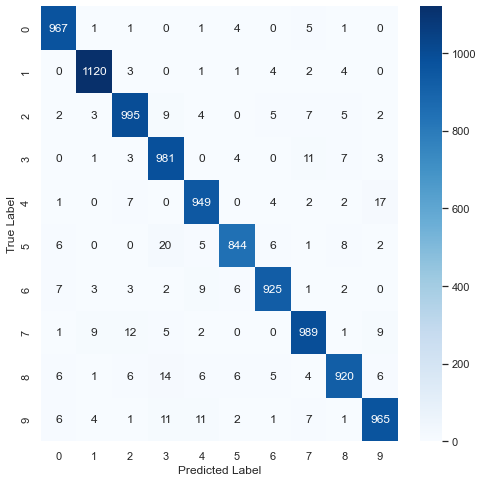

In [112]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
- 분류 보고서

In [113]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.94      0.97      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


In [114]:
model.save('mnist_model.h5')

In [115]:
loaded_model = models.load_model('mnist_model.h5')

In [116]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [120]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)

np.set_printoptions(precision=7)
print(pred_ys2[0])

313/313 [==============================] - 0s 795us/step
(10000, 10)
[1.9869776e-06 2.7940155e-06 1.9717988e-04 2.4380239e-03 7.9655712e-07
 1.7925708e-05 1.2398776e-07 9.9730742e-01 5.2753326e-06 2.8509505e-05]


Text(0.5, 1.0, 'predicted label: 7')

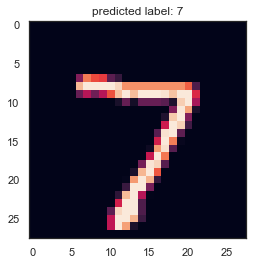

In [121]:
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

plt.imshow(x_test[0])
plt.title("predicted label: {}".format(arg_pred_y2[0]))

## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


In [125]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)


print("학습 데이터 : {}\t 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터 : {}\t 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터 : {}\t 레이블: {}".format(x_test.shape, y_test.shape))												  


x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.


y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

def build_model():
    model = Sequential([Input(shape=(28,28), name='input'),
                    Flatten(input_shape=[28,28], name='flatten'),
                    Dense(100, activation='relu', name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(10, activation='softmax', name='output')])
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    return model


model = build_model()

model.summary()
    

학습 데이터 : (60000, 28, 28)	 레이블: (60000,)
학습 데이터 : (42000, 28, 28)	 레이블: (42000,)
검증 데이터 : (18000, 28, 28)	 레이블: (18000,)
테스트 데이터 : (10000, 28, 28)	 레이블: (10000,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trai

In [129]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

### ModelCheckpoint

In [ ]:
check_point_cb = ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10, callbacks=[check_point_cb])

In [128]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [130]:
loaded_model = load_model('keras_mnist_model.h5')

In [132]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


최상의 모델만을 저장
- save_best_only=True

In [133]:
model = build_model()

cp = ModelCheckpoint('keras_best_model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val), callbacks=[cp])

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8162 - accuracy: 0.7730 - val_loss: 0.3830 - val_accuracy: 0.8879
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3383 - accuracy: 0.9025 - val_loss: 0.3097 - val_accuracy: 0.9088
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2708 - accuracy: 0.9213 - val_loss: 0.2519 - val_accuracy: 0.9279
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2294 - accuracy: 0.9336 - val_loss: 0.2280 - val_accuracy: 0.9329
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1999 - accuracy: 0.9424 - val_loss: 0.2030 - val_accuracy: 0.9414
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1775 - accuracy: 0.9486 - val_loss: 0.1875 - val_accuracy: 0.9444
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1595 - accuracy: 0.9535 - val_loss: 0.1735 - val_accuracy:

In [134]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [135]:
loaded_model2 = load_model('keras_best_model.h5')
loaded_model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

In [136]:
model = build_model()

cp = ModelCheckpoint('keras_best_model2.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_val, y_val), callbacks=[cp, early_stopping_cb])

Epoch 1/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8792 - accuracy: 0.7457 - val_loss: 0.4051 - val_accuracy: 0.8738
Epoch 2/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3272 - accuracy: 0.9047 - val_loss: 0.2951 - val_accuracy: 0.9127
Epoch 3/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2592 - accuracy: 0.9236 - val_loss: 0.2441 - val_accuracy: 0.9276
Epoch 4/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2163 - accuracy: 0.9376 - val_loss: 0.2125 - val_accuracy: 0.9358
Epoch 5/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1873 - accuracy: 0.9456 - val_loss: 0.1904 - val_accuracy: 0.9438
Epoch 6/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1663 - accuracy: 0.9506 - val_loss: 0.1779 - val_accuracy: 0.9471
Epoch 7/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1495 - accuracy: 0.9562 - val_loss: 0.1605 - val_accuracy:

### LearningRateScheduler

In [137]:
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

In [138]:
model = build_model()
round(model.optimizer.lr.numpy(), 5)

0.01

In [139]:
lr_scheduler_cb = LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

In [142]:
TensorBoard(log_dir='.logs', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
log_dir='./logs'

tensor_board_cb = [TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_images=True)]

model = build_model()

model.fit(x_train, y_train, batch_size=32, validation_data)


load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000